<a href="https://colab.research.google.com/github/abdelrhmanhesham1/project/blob/main/Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Housing.csv')

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

# Convert categorical variables to numerical using one-hot encoding
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


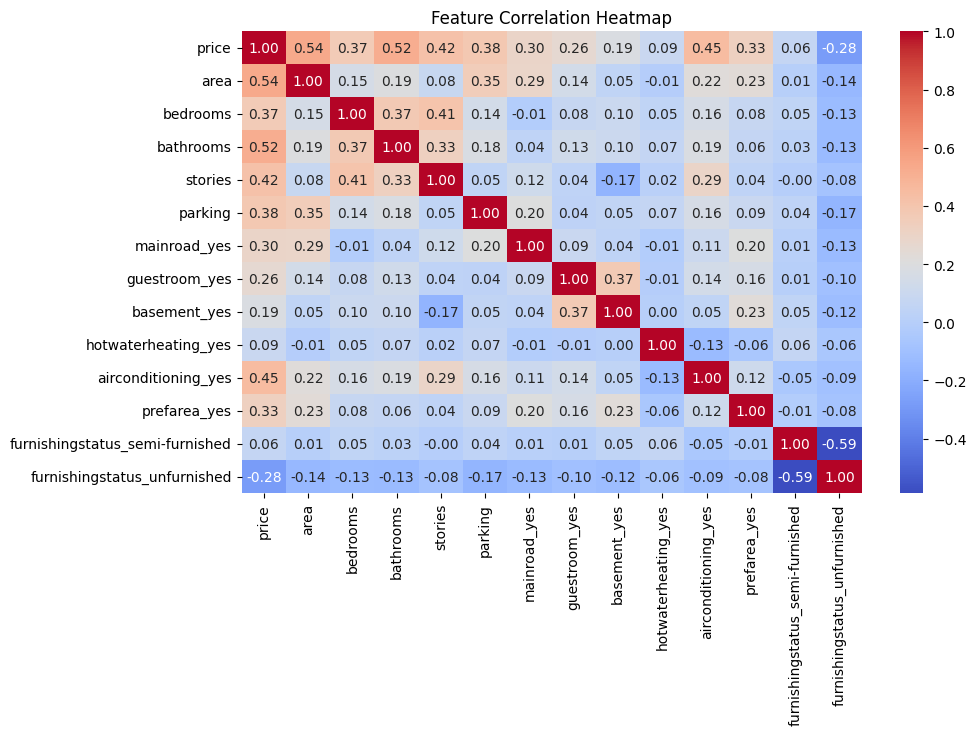

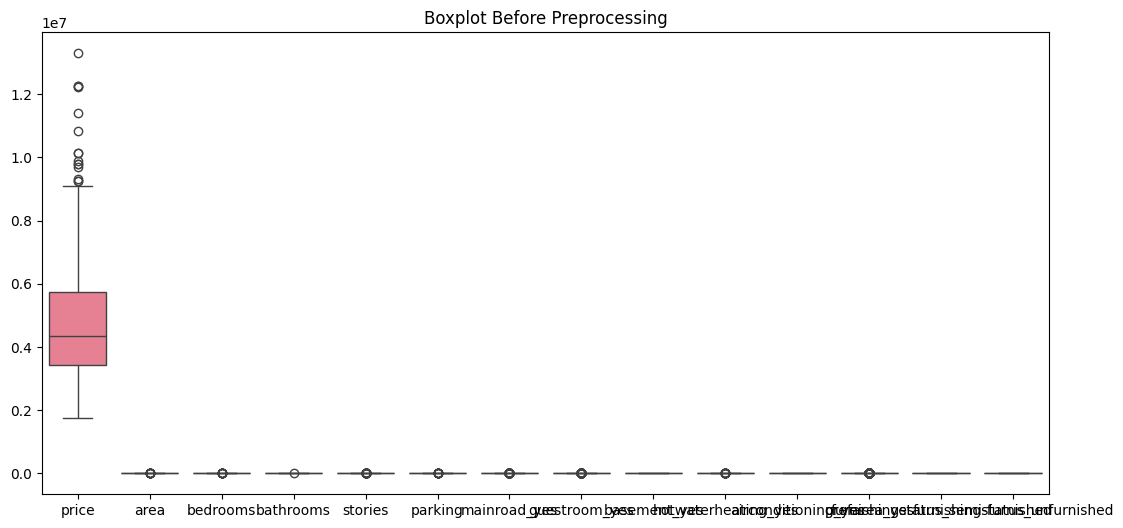

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot before preprocessing
plt.figure(figsize=(13, 6))
sns.boxplot(data=df)
plt.title('Boxplot Before Preprocessing')
plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Feature selection
selected_features = corr_matrix['price'][corr_matrix['price'] > 0.5].index
df_selected = df[selected_features]

In [107]:
from sklearn.model_selection import train_test_split

# Train-test split
X = df_selected.drop('price', axis=1)
y = df_selected['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

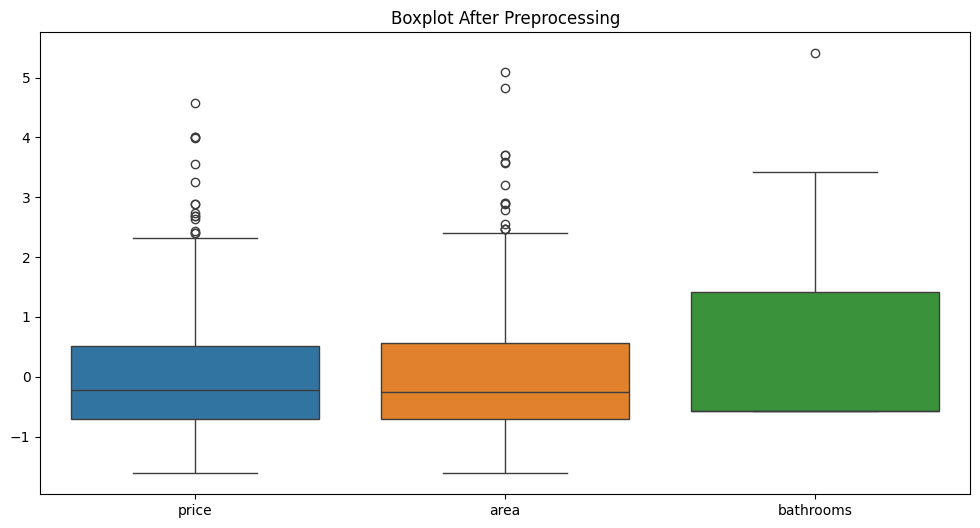

In [108]:
# Boxplot after preprocessing
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_selected)
plt.title('Boxplot After Preprocessing')
plt.show()

In [109]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Calculate coefficients using the normal equation
        self.coefficients = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.coefficients)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Calculate MSE
mse = lr.mse(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.8262343148219742


In [110]:
from sklearn.linear_model import LinearRegression as SkLinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
sk_lr = SkLinearRegression()
sk_lr.fit(X_train, y_train)

# Predict on test set
y_pred_sk = sk_lr.predict(X_test)

# Calculate MSE
mse_sk = mean_squared_error(y_test, y_pred_sk)
print(f'MSE : {mse}')
print(f'MSE from Scikit-Learn: {mse_sk}')

MSE : 0.8262343148219742
MSE from Scikit-Learn: 0.8262343148219742


In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train polynomial regression model
poly_lr = SkLinearRegression()
poly_lr.fit(X_train_poly, y_train)

# Predict on test set
y_pred_poly = poly_lr.predict(X_test_poly)

# Calculate MSE
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'MSE with Polynomial Regression: {mse_poly}')

MSE with Polynomial Regression: 0.7934295836794331


In [112]:
print(f'MSE from Scratch: {mse}')
print(f'MSE from Scikit-Learn: {mse_sk}')
print(f'MSE with Polynomial Regression: {mse_poly}')

MSE from Scratch: 0.8262343148219742
MSE from Scikit-Learn: 0.8262343148219742
MSE with Polynomial Regression: 0.7934295836794331


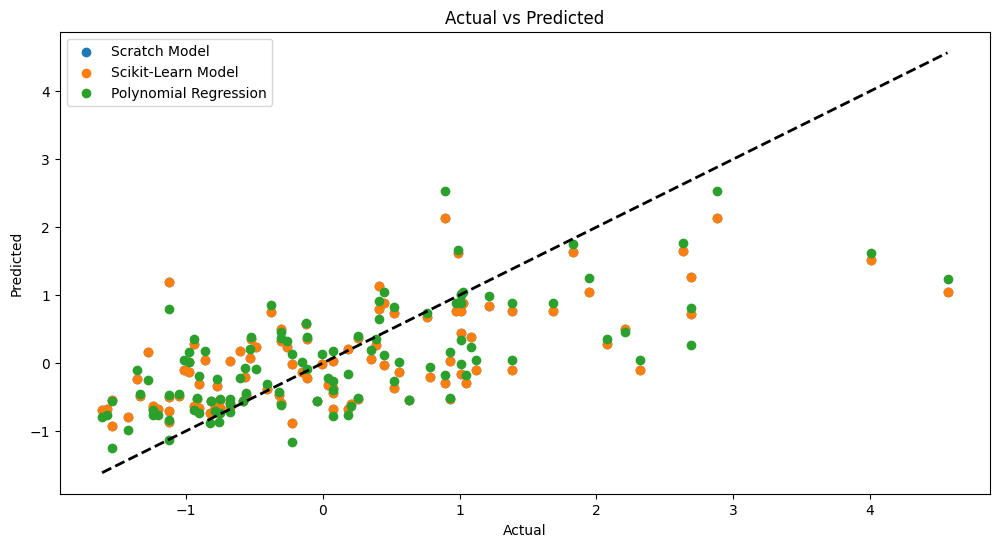

In [113]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Scratch Model')
plt.scatter(y_test, y_pred_sk, label='Scikit-Learn Model')
plt.scatter(y_test, y_pred_poly, label='Polynomial Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [114]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Create dataframes for both models
df_poly = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly, 'Model': 'Polynomial Regression'})
df_sklearn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_sk, 'Model': 'Scikit-Learn Model'})

df_results = pd.concat([df_poly, df_sklearn])  # Combine both models

# Create scatter plot
fig = px.scatter(df_results, x='Actual', y='Predicted', color='Model', title="Actual vs Predicted")

# Add ideal reference line (y = x)
fig.add_trace(go.Scatter(
    x=[df_results['Actual'].min(), df_results['Actual'].max()],
    y=[df_results['Actual'].min(), df_results['Actual'].max()],
    mode='lines',
    name='Ideal Prediction',
    line=dict(dash='dash', color='black')
))

fig.show()
